<a href="https://colab.research.google.com/github/kky107102/ML_TEAM8/blob/main/Fake_test_openjourney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 전처리

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gangyeonee","key":"439884bd9c44b7629b04d9101d06cf61"}'}

## Download

### Fake Download


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
#Fake directory 생성
!mkdir -p fake

# 해당 dataset png파일들만 존재..
!kaggle datasets download -d jacobheldt/syntheticeue-ai-generated-images-dataset -p fake --unzip

Dataset URL: https://www.kaggle.com/datasets/jacobheldt/syntheticeue-ai-generated-images-dataset
License(s): CC0-1.0
100% 5.36G/5.36G [03:29<00:00, 35.9MB/s]
100% 5.36G/5.36G [03:29<00:00, 27.5MB/s]


In [5]:
import os
import random
import shutil

# 원본 폴더와 대상 폴더 경로 설정
source_folder = '/content/fake/SyntheticEye AI-Generated Images Dataset/Openjourney'  # 주의: 실제 경로에 맞게 수정하세요!
destination_folder = '/content/selected/selected_fake_images'  # 대상 폴더 경로도 실제 경로로 수정하세요!

# 대상 폴더가 없으면 생성
os.makedirs(destination_folder, exist_ok=True)

# 랜덤하게 선택할 이미지의 수 설정
num_images_to_select = 7000

# source_folder 내의 모든 파일 목록 가져오기
all_image_files = []
for item_name in os.listdir(source_folder):
    item_path = os.path.join(source_folder, item_name)
    # 폴더인지 확인
    if os.path.isdir(item_path):
        # 폴더 내의 이미지 파일 목록 추가
        all_image_files.extend([os.path.join(item_path, file) for file in os.listdir(item_path) if file.endswith('.jpg') or file.endswith('.png')])
    elif item_name.endswith('.jpg') or item_name.endswith('.png'):
        # 폴더가 아닌 이미지 파일 목록 추가
        all_image_files.append(item_path)

# 이미지 파일 목록에서 랜덤하게 선택
selected_real_images = random.sample(all_image_files, min(num_images_to_select, len(all_image_files)))

# 선택된 이미지를 대상 폴더로 복사
for source_image_path in selected_real_images:
    image_name = os.path.basename(source_image_path)
    destination_image_path = os.path.join(destination_folder, image_name)
    shutil.copy(source_image_path, destination_image_path)

print(f"{min(num_images_to_select, len(all_image_files))}개의 이미지를 랜덤으로 선택하여 {destination_folder} 폴더에 복사했습니다.")



7000개의 이미지를 랜덤으로 선택하여 /content/selected/selected_fake_images 폴더에 복사했습니다.


In [6]:

import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# 이미지가 있는 폴더 경로 설정
folder_path = 'selected/selected_fake_images'

# 폴더 내의 이미지 파일 목록 가져오기
image_files = [file for file in os.listdir(folder_path) if file.endswith('.jpg') or file.endswith('.png')]
print(f'폴더 내의 이미지 파일 개수: {len(image_files)}')

폴더 내의 이미지 파일 개수: 7000


### Real Download

In [7]:
#Fake directory 생성
!mkdir -p real

#1분 정도 걸립니다. content/real 안에 생기도록 설정함.
# 해당 dataset JPEG 파일들만 존재..
!kaggle datasets download -d ifigotin/imagenetmini-1000 -p real --unzip

Dataset URL: https://www.kaggle.com/datasets/ifigotin/imagenetmini-1000
License(s): unknown
100% 3.92G/3.92G [01:47<00:00, 43.3MB/s]
100% 3.92G/3.92G [01:47<00:00, 39.3MB/s]


In [8]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# 이미지가 있는 폴더 경로 설정
folder_path = '/content/real/imagenet-mini/train/n01443537'

# 폴더 내의 이미지 파일 목록 가져오기
image_files = [file for file in os.listdir(folder_path) if file.endswith('.JPEG')]
print(f'폴더 내의 이미지 파일 개수: {len(image_files)}')

폴더 내의 이미지 파일 개수: 36


In [9]:
import os
import random
import shutil

# 원본 폴더와 대상 폴더 경로 설정
source_folder = '/content/real/imagenet-mini/train'  # 주의: 실제 경로에 맞게 수정하세요!
destination_folder = '/content/selected/selected_real_images'  # 대상 폴더 경로도 실제 경로로 수정하세요!

# 대상 폴더가 없으면 생성
os.makedirs(destination_folder, exist_ok=True)

# 랜덤하게 선택할 이미지의 수 설정
num_images_to_select = 10

# 모든 폴더 순회
for folder_name in os.listdir(source_folder):
    folder_path = os.path.join(source_folder, folder_name)
    # 폴더인지 확인
    if os.path.isdir(folder_path):
        # 폴더 내의 이미지 파일 목록 가져오기
        image_files = [file for file in os.listdir(folder_path) if file.endswith('.JPEG')]
        # 랜덤하게 이미지 선택
        selected_real_images = random.sample(image_files, min(num_images_to_select, len(image_files)))
        # 선택된 이미지를 대상 폴더로 복사
        for image_name in selected_real_images:
            source_image_path = os.path.join(folder_path, image_name)
            destination_image_path = os.path.join(destination_folder, image_name)
            shutil.copy(source_image_path, destination_image_path)

print(f"{num_images_to_select}개의 이미지를 랜덤으로 선택하여 {destination_folder} 폴더에 복사했습니다.")


10개의 이미지를 랜덤으로 선택하여 /content/selected/selected_real_images 폴더에 복사했습니다.


In [10]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# 이미지가 있는 폴더 경로 설정
folder_path = '/content/selected/selected_real_images'

# 폴더 내의 이미지 파일 목록 가져오기
image_files = [file for file in os.listdir(folder_path) if file.endswith('.JPEG')]
print(f'폴더 내의 이미지 파일 개수: {len(image_files)}')


폴더 내의 이미지 파일 개수: 9989


## 데이터 처리


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from IPython.display import Image

데이터 가져오기

In [12]:
dataset_dir1 = "/content/selected"
print("Loading dataset from: " + dataset_dir1)


Loading dataset from: /content/selected


In [13]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


### Fake: 0 / Real: 1 Labeling

In [14]:
import tensorflow as tf
import os

# 이미지 크기와 배치 크기 설정
img_height = 64
img_width = 64
batch_size = 50
dir1_dataset = tf.keras.utils.image_dataset_from_directory(
  dataset_dir1,
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = batch_size)

def set_labels_to_value(image, label):
    new_label = tf.fill(tf.shape(label), 1)  # 예시: 모든 라벨 값을 1로 설정
    return image, new_label


for i, l in dir1_dataset.take(5):
  print("label:",l)
print(len(dir1_dataset))


final_dataset = dir1_dataset

Found 16989 files belonging to 2 classes.
label: tf.Tensor(
[1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0
 1 1 1 0 1 1 0 1 0 0 0 1 0], shape=(50,), dtype=int32)
label: tf.Tensor(
[1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0
 1 1 1 0 0 1 0 0 1 1 0 1 1], shape=(50,), dtype=int32)
label: tf.Tensor(
[0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0
 1 0 1 1 0 1 1 1 1 0 0 1 1], shape=(50,), dtype=int32)
label: tf.Tensor(
[1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0
 1 1 1 1 0 0 1 1 0 1 1 0 0], shape=(50,), dtype=int32)
label: tf.Tensor(
[0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1
 0 1 0 1 1 1 0 1 1 1 0 0 1], shape=(50,), dtype=int32)
340


In [15]:
final_shuffled_dataset = final_dataset.shuffle(buffer_size=len(final_dataset), seed=400) #데이터셋 섞기

In [16]:
len(final_shuffled_dataset)

340

In [17]:
dataset_size = len(final_dataset)
train_validation_size = int(dataset_size * 0.8) #train과 test사이즈를 80%
test_size = dataset_size - train_validation_size
train_validation_dataset = final_shuffled_dataset.take(train_validation_size)
test_dataset = final_shuffled_dataset.skip(train_validation_size)


train_size = int(train_validation_size * 0.8) #train 데이터셋 사이즈를 90%
validation_size = train_validation_size - train_size
train_dataset = train_validation_dataset.take(train_size)
validation_dataset = train_validation_dataset.skip(train_size)


print("train_dataset size:",len(train_dataset))
print("validation_dataset size:",len(validation_dataset))
print("test_dataset size",len(test_dataset))


train_dataset size: 217
validation_dataset size: 55
test_dataset size 68


# Transfer Learning

## ResNet

In [18]:
# Building the Transfer Learning model using ResNet50
ResNet_base_model = tf.keras.applications.ResNet50(
    include_top = False,
    weights = 'imagenet',
    input_shape = (img_height, img_width, 3),
    pooling = 'max'
)
ResNet_base_model.trainable = True

# Create a new model on top of the ResNet50 base
inputs = tf.keras.Input(shape = (img_height, img_width, 3))
x = ResNet_base_model(inputs, training = False)
x = BatchNormalization(axis = -1, momentum = 0.99, epsilon = 0.001)(x)
x = Dense(128,
          kernel_regularizer = regularizers.l2(0.01),
          activity_regularizer = regularizers.l1(0.01),
          bias_regularizer = regularizers.l1(0.01),
          activation = 'relu')(x)
x = Dropout(rate = .2, seed = 512)(x)
x = Dense(64, activation = 'relu')(x)
outputs = Dense(1, activation = 'sigmoid')(x)
ResNet_model = tf.keras.Model(inputs, outputs)

# Compile the model
ResNet_model.compile(
    optimizer = tf.keras.optimizers.Adamax(learning_rate = .001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Summary of the model
ResNet_model.summary()

94765736/94765736 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 batch_normalization (Batch  (None, 2048)              8192      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256   

In [19]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

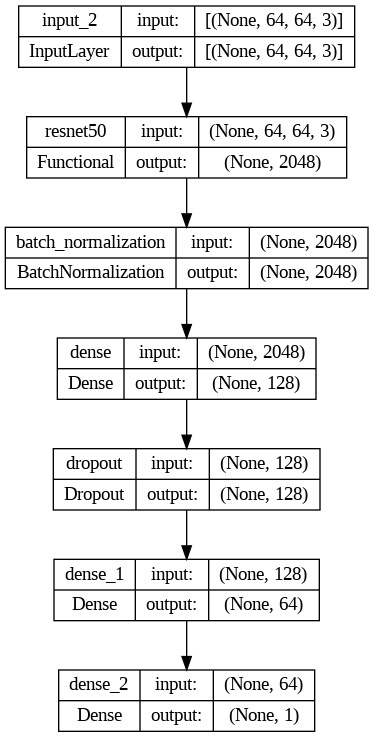

In [20]:
# Visualize the ResNet model architecture
tf.keras.utils.plot_model(ResNet_model, show_shapes = True, to_file = 'ResNet_model.png')
Image('ResNet_model.png')

In [21]:
# Train the Transfer Learning model
print("Starting training with Transfer Learning using ResNet50...")
ResNet_model_history = ResNet_model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = 10,
    verbose = 1,
    callbacks = [early_stopping]
)
print("Transfer Learning training finished.")

Starting training with Transfer Learning using ResNet50...
Epoch 1/10
217/217 [==============================] - 92s 182ms/step - loss: 2.3146 - accuracy: 0.6971 - precision: 0.6989 - recall: 0.8500 - val_loss: 2.1492 - val_accuracy: 0.8207 - val_precision: 0.7755 - val_recall: 0.9822
Epoch 2/10
217/217 [==============================] - 56s 166ms/step - loss: 1.2083 - accuracy: 0.9028 - precision: 0.9279 - recall: 0.9049 - val_loss: 1.5145 - val_accuracy: 0.6767 - val_precision: 0.9957 - val_recall: 0.4389
Epoch 3/10
217/217 [==============================] - 56s 166ms/step - loss: 0.7308 - accuracy: 0.9205 - precision: 0.9346 - recall: 0.9290 - val_loss: 0.5676 - val_accuracy: 0.9407 - val_precision: 0.9570 - val_recall: 0.9395
Epoch 4/10
217/217 [==============================] - 56s 166ms/step - loss: 0.4665 - accuracy: 0.9318 - precision: 0.9401 - recall: 0.9431 - val_loss: 1.4358 - val_accuracy: 0.4669 - val_precision: 1.0000 - val_recall: 0.1001
Epoch 5/10
217/217 [=============

### 결과

In [22]:
# Evaluate the model on the vaildation dataset
val_loss, val_accuracy, val_precision, val_recall = ResNet_model.evaluate(validation_dataset)

# Print the metrics
print(f"Val Loss: {val_loss:.4f}")
print(f"Val Accuracy: {val_accuracy:.4f}")
print(f"Val Precision: {val_precision:.4f}")
print(f"Val Recall: {val_recall:.4f}")

55/55 [==============================] - 21s 20ms/step - loss: 0.2363 - accuracy: 0.9051 - precision: 0.9993 - recall: 0.8407
Val Loss: 0.2363
Val Accuracy: 0.9051
Val Precision: 0.9993
Val Recall: 0.8407


In [23]:
# 데스트 데이터 셋
test_loss, test_accuracy, test_precision, test_recall = ResNet_model.evaluate(test_dataset)

print(f"test Loss: {test_loss:.4f}")
print(f"test Accuracy: {test_accuracy:.4f}")
print(f"test Precision: {test_precision:.4f}")
print(f"test Recall: {test_recall:.4f}")

68/68 [==============================] - 21s 20ms/step - loss: 0.2435 - accuracy: 0.8985 - precision: 0.9994 - recall: 0.8273
test Loss: 0.2435
test Accuracy: 0.8985
test Precision: 0.9994
test Recall: 0.8273


### Saving Model

In [24]:
#모델 저장
ResNet_model.save('ResNet_c_model.h5')
model_json = ResNet_model.to_json()
with open('ResNet_model.json','w') as f:
  f.write(model_json)
  ResNet_model.save('ResNet_c_model.h5')  # 모델 구조와 가중치를 함께 저장

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
#모델 불러오기
ResNet_model = tf.keras.models.load_model('ResNet_c_model.h5')

### 평가 + 시각화

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 테스트 데이터셋에 대한 예측, 실제 레이블, 이미지 추출
X_test = []
y_true = []
y_pred = []
tp_images, tn_images, fp_images, fn_images = [], [], [], []

for images, labels in test_dataset:
    predictions = ResNet_model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(predictions > 0.5)  # Thresholding으로 예측값 구하기

    # TP, TN, FP, FN 이미지 분류
    for i in range(len(predictions)):
        if predictions[i] > 0.5 and labels[i] == 1:
            tp_images.append(images[i])
        elif predictions[i] <= 0.5 and labels[i] == 0:
            tn_images.append(images[i])
        elif predictions[i] > 0.5 and labels[i] == 0:
            fp_images.append(images[i])
        elif predictions[i] <= 0.5 and labels[i] == 1:
            fn_images.append(images[i])

# 이미지 리스트에서 처음 5장만 선택
tp_images = tp_images[:5]
tn_images = tn_images[:5]
fp_images = fp_images[:5]
fn_images = fn_images[:5]

# y_true와 y_pred를 numpy 배열로 변환
y_true = np.array(y_true)
y_pred = np.array(y_pred)

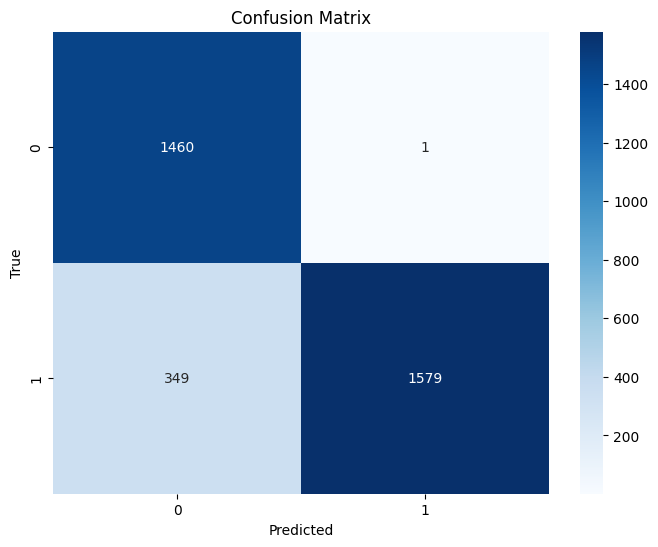

Accuracy: 0.8967246975509
Precision: 0.9993670886075949
Recall: 0.8189834024896265
F1 Score: 0.9002280501710377


In [27]:
# confusion matrix 생성
conf_matrix = confusion_matrix(y_true, y_pred)

# confusion matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 평가 지표 계산
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# 평가 지표 출력
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

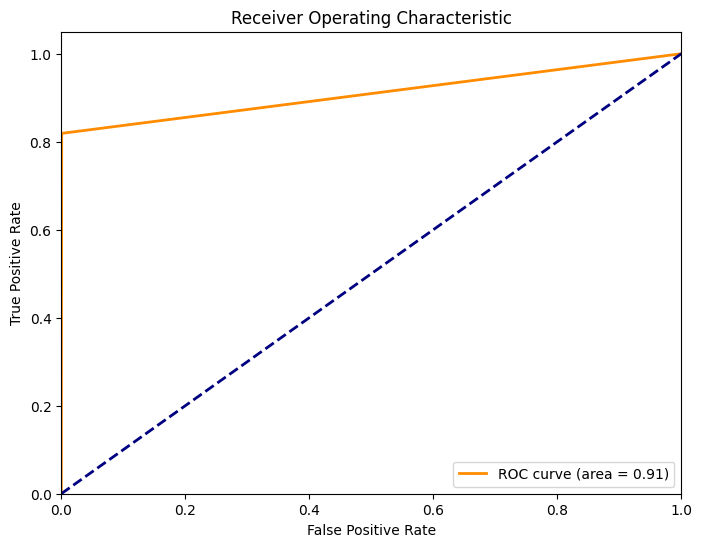

In [28]:
# ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [29]:
# correct
# TP (True Positive), 예측 1 실제로도 1
tp = conf_matrix[1, 1]
# TN (True Negative), 예측 0 실제로도 0
tn = conf_matrix[0, 0]

# wrong
# FP (False Positive), 예측 1 실제는 0
fp = conf_matrix[0, 1]
# FN (False Negative), 예측 0 실제는 1
fn = conf_matrix[1, 0]

print("True Positive (TP):", tp)
print("True Negative (TN):", tn)
print("False Positive (FP):", fp)
print("False Negative (FN):", fn)

True Positive (TP): 1579
True Negative (TN): 1460
False Positive (FP): 1
False Negative (FN): 349


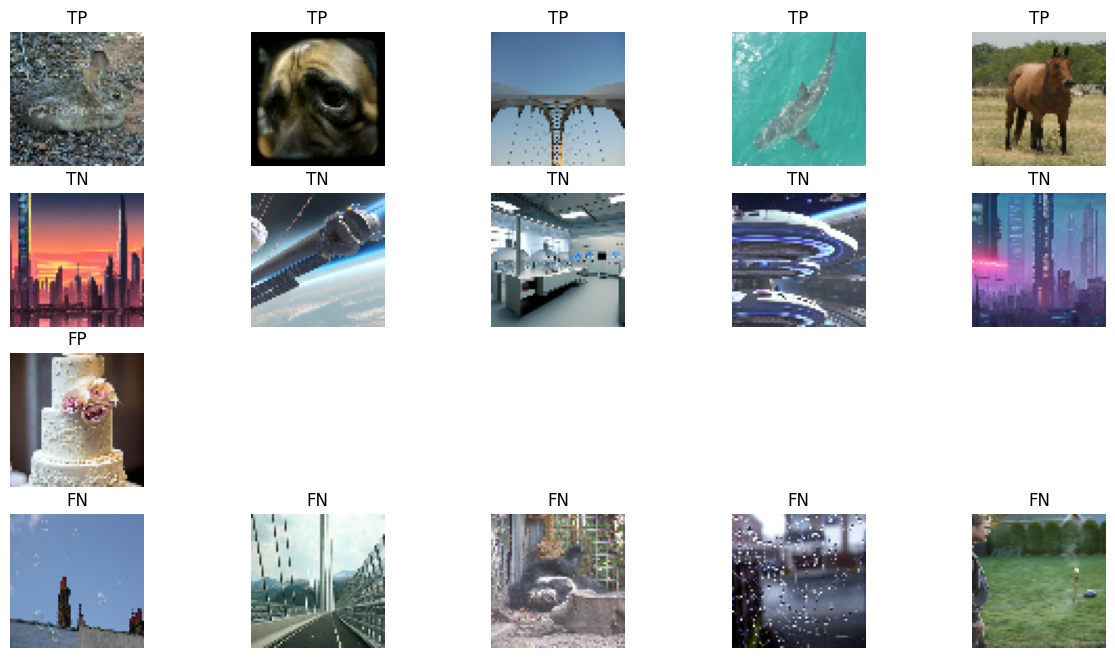

In [30]:
plt.figure(figsize=(15, 8))

# TP 이미지 출력
for i in range(len(tp_images)):
    plt.subplot(4, 5, i + 1)
    plt.imshow(tp_images[i].numpy().astype("uint8"))
    plt.title('TP')
    plt.axis('off')

# TN 이미지 출력
for i in range(len(tn_images)):
    plt.subplot(4, 5, i + 6)
    plt.imshow(tn_images[i].numpy().astype("uint8"))
    plt.title('TN')
    plt.axis('off')

# FP 이미지 출력
for i in range(len(fp_images)):
    plt.subplot(4, 5, i + 11)
    plt.imshow(fp_images[i].numpy().astype("uint8"))
    plt.title('FP')
    plt.axis('off')

# FN 이미지 출력
for i in range(len(fn_images)):
    plt.subplot(4, 5, i + 16)
    plt.imshow(fn_images[i].numpy().astype("uint8"))
    plt.title('FN')
    plt.axis('off')

plt.show()

## **VGG16 모델**

In [31]:
# Building the Transfer Learning model using VGG16
VGG_base_model = tf.keras.applications.VGG16(
    include_top = False,
    weights = 'imagenet',
    input_shape = (img_height, img_width, 3),
    pooling = 'max'
)
VGG_base_model.trainable = True



58889256/58889256 [==============================] - 2s 0us/step


In [32]:
# Create a new model on top of the VGG16 base
inputs = tf.keras.Input(shape = (img_height, img_width, 3))
x = VGG_base_model(inputs, training = False)
x = BatchNormalization(axis = -1, momentum = 0.99, epsilon = 0.001)(x)
x = Dense(256,
          kernel_regularizer = regularizers.l2(0.01),
          activity_regularizer = regularizers.l1(0.01),
          bias_regularizer = regularizers.l1(0.01),
          activation = 'relu')(x)
x = Dropout(rate = .4, seed = 512)(x)
x = Dense(64, activation = 'relu')(x)
outputs = Dense(1, activation = 'sigmoid')(x)
VGG_model = tf.keras.Model(inputs, outputs)


In [33]:
# Compile the Transfer Learning model
VGG_model.compile(
    optimizer = tf.keras.optimizers.Adamax(learning_rate = .001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Build the Transfer Learning model so we can see a summary
VGG_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                           

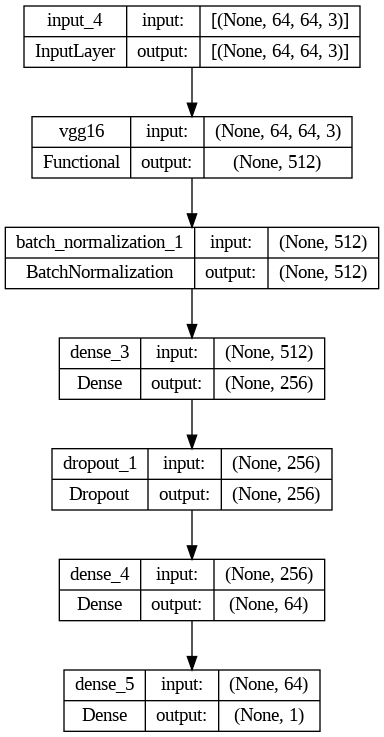

In [34]:
# Visualize the VGG model architecture
from IPython.display import Image

tf.keras.utils.plot_model(VGG_model, show_shapes = True, to_file = 'VGG_model.png')
Image('VGG_model.png')

In [35]:
print("Starting training with Transfer Learning using VGG16...")
VGG_model_history = VGG_model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = 10,
    verbose = 1,
    callbacks = [early_stopping]
)
print("Transfer Learning training finished.")

Starting training with Transfer Learning using VGG16...
Epoch 1/10
217/217 [==============================] - 65s 169ms/step - loss: 1.8106 - accuracy: 0.8452 - precision_1: 0.8548 - recall_1: 0.8870 - val_loss: 0.8888 - val_accuracy: 0.8964 - val_precision_1: 0.9037 - val_recall_1: 0.9201
Epoch 2/10
217/217 [==============================] - 60s 183ms/step - loss: 0.6125 - accuracy: 0.9105 - precision_1: 0.9212 - recall_1: 0.9292 - val_loss: 0.5137 - val_accuracy: 0.8887 - val_precision_1: 0.8452 - val_recall_1: 0.9887
Epoch 3/10
217/217 [==============================] - 56s 167ms/step - loss: 0.3587 - accuracy: 0.9260 - precision_1: 0.9345 - recall_1: 0.9395 - val_loss: 1.2000 - val_accuracy: 0.5955 - val_precision_1: 0.9979 - val_recall_1: 0.3051
Epoch 4/10
217/217 [==============================] - 56s 167ms/step - loss: 0.2654 - accuracy: 0.9367 - precision_1: 0.9450 - recall_1: 0.9478 - val_loss: 0.6206 - val_accuracy: 0.7707 - val_precision_1: 0.9959 - val_recall_1: 0.6090
Epoc

### 결과

In [36]:

val_loss, val_accuracy, val_precision, val_recall = VGG_model.evaluate(validation_dataset)

# Print the metrics
print(f"val Loss: {val_loss:.4f}")
print(f"Val Accuracy: {val_accuracy:.4f}")
print(f"Val Precision: {val_precision:.4f}")
print(f"Val Recall: {val_recall:.4f}")

55/55 [==============================] - 21s 23ms/step - loss: 0.2227 - accuracy: 0.9331 - precision_1: 0.9003 - recall_1: 0.9943
val Loss: 0.2227
Val Accuracy: 0.9331
Val Precision: 0.9003
Val Recall: 0.9943


테스트셋으로 검증

In [37]:
# Evaluate the model on the test dataset
test_loss, test_accuracy, test_precision, test_recall = VGG_model.evaluate(test_dataset)

# Print the metrics
print(f"test Loss: {test_loss:.4f}")
print(f"test Accuracy: {test_accuracy:.4f}")
print(f"test Precision: {test_precision:.4f}")
print(f"test Recall: {test_recall:.4f}")

68/68 [==============================] - 21s 22ms/step - loss: 0.2048 - accuracy: 0.9350 - precision_1: 0.9027 - recall_1: 0.9960
test Loss: 0.2048
test Accuracy: 0.9350
test Precision: 0.9027
test Recall: 0.9960


### Saving Model

In [38]:
VGG_model.save('VGG16_model.h5')  # 모델 구조와 가중치를 함께 저장

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [39]:
VGG_model = tf.keras.models.load_model('VGG16_model.h5')


### 평가 + 시각화

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 테스트 데이터셋에 대한 예측, 실제 레이블, 이미지 추출
X_test = []
y_true = []
y_pred = []
tp_images, tn_images, fp_images, fn_images = [], [], [], []

for images, labels in test_dataset:
    predictions = VGG_model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(predictions > 0.5)  # Thresholding으로 예측값 구하기

    # TP, TN, FP, FN 이미지 분류
    for i in range(len(predictions)):
        if predictions[i] > 0.5 and labels[i] == 1:
            tp_images.append(images[i])
        elif predictions[i] <= 0.5 and labels[i] == 0:
            tn_images.append(images[i])
        elif predictions[i] > 0.5 and labels[i] == 0:
            fp_images.append(images[i])
        elif predictions[i] <= 0.5 and labels[i] == 1:
            fn_images.append(images[i])

# 이미지 리스트에서 처음 5장만 선택
tp_images = tp_images[:5]
tn_images = tn_images[:5]
fp_images = fp_images[:5]
fn_images = fn_images[:5]

# y_true와 y_pred를 numpy 배열로 변환
y_true = np.array(y_true)
y_pred = np.array(y_pred)

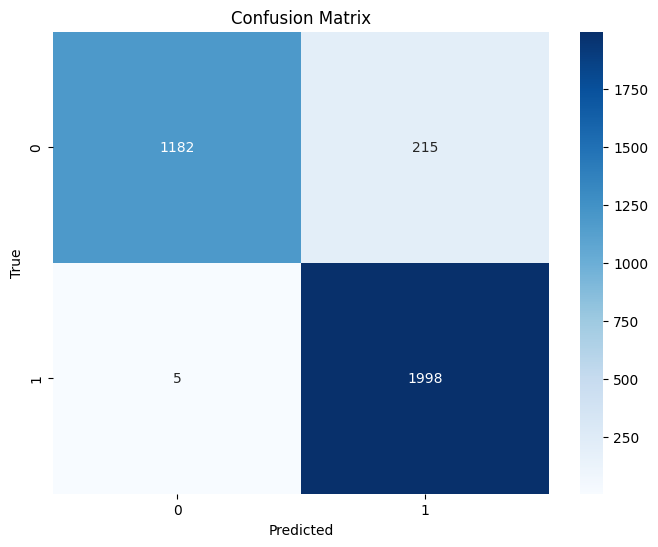

Accuracy: 0.9352941176470588
Precision: 0.902846814279259
Recall: 0.9975037443834248
F1 Score: 0.9478178368121443


In [41]:
# confusion matrix 생성
conf_matrix = confusion_matrix(y_true, y_pred)

# confusion matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 평가 지표 계산
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# 평가 지표 출력
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

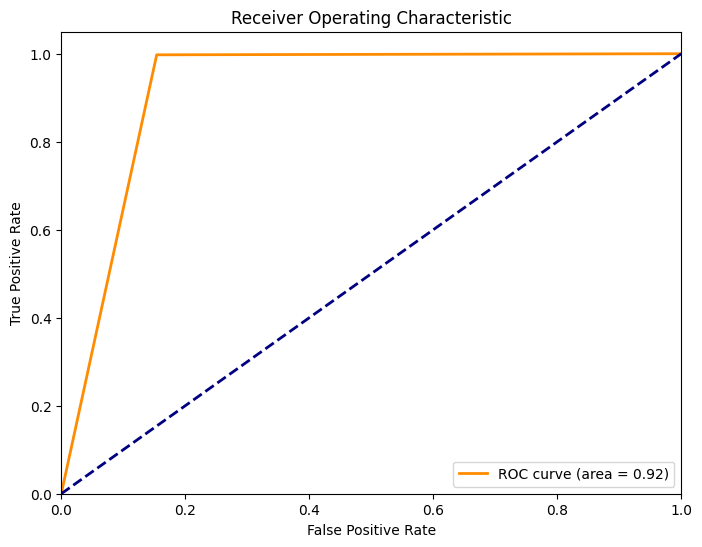

In [42]:
# ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [43]:
# correct
# TP (True Positive), 예측 1 실제로도 1
tp = conf_matrix[1, 1]
# TN (True Negative), 예측 0 실제로도 0
tn = conf_matrix[0, 0]

# wrong
# FP (False Positive), 예측 1 실제는 0
fp = conf_matrix[0, 1]
# FN (False Negative), 예측 0 실제는 1
fn = conf_matrix[1, 0]

print("True Positive (TP):", tp)
print("True Negative (TN):", tn)
print("False Positive (FP):", fp)
print("False Negative (FN):", fn)

True Positive (TP): 1998
True Negative (TN): 1182
False Positive (FP): 215
False Negative (FN): 5


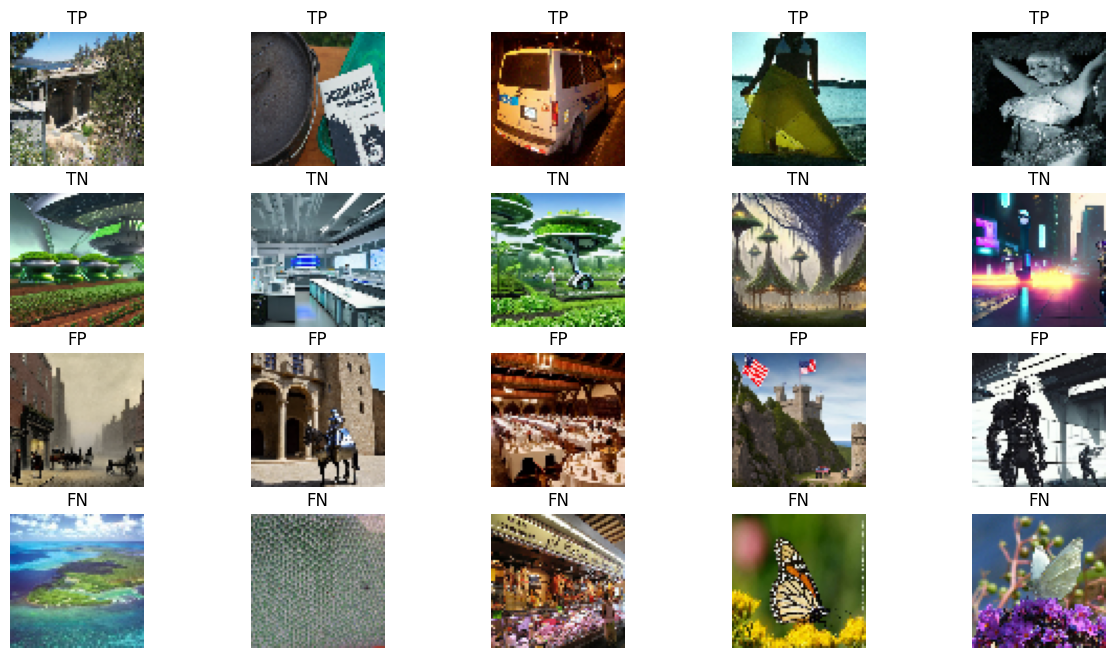

In [44]:
plt.figure(figsize=(15, 8))

# TP 이미지 출력
for i in range(len(tp_images)):
    plt.subplot(4, 5, i + 1)
    plt.imshow(tp_images[i].numpy().astype("uint8"))
    plt.title('TP')
    plt.axis('off')

# TN 이미지 출력
for i in range(len(tn_images)):
    plt.subplot(4, 5, i + 6)
    plt.imshow(tn_images[i].numpy().astype("uint8"))
    plt.title('TN')
    plt.axis('off')

# FP 이미지 출력
for i in range(len(fp_images)):
    plt.subplot(4, 5, i + 11)
    plt.imshow(fp_images[i].numpy().astype("uint8"))
    plt.title('FP')
    plt.axis('off')

# FN 이미지 출력
for i in range(len(fn_images)):
    plt.subplot(4, 5, i + 16)
    plt.imshow(fn_images[i].numpy().astype("uint8"))
    plt.title('FN')
    plt.axis('off')

plt.show()